In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Import data: 

In [3]:
df=pd.read_csv("TelcomCustomer-Churn.csv")
df.shape

(7043, 21)

In [4]:
df1=pd.read_csv("TelcomCustomer-Churn_1.csv")
df1.shape

(7043, 10)

In [5]:
df2=pd.read_csv("TelcomCustomer-Churn_2.csv")
df2.shape

(7043, 11)

In [6]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [7]:
df2.head()

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
pd.set_option('max_columns',None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**We already have a combined dataset ready,so directly using that** (instead of combining the two split datasets) **for further analysis.**
Mysql server could not be initiated on system therefore using this database for project.

# Data cleansing:

In [9]:
def explore (x):
    
    print("\033[1m HEAD\n\033[0m",x.head())
    print("\033[1m\nTAIL\n\033[0m",x.tail())
    print("\033[1m\nDATA TYPES\n\033[0m",x.dtypes)
    print("\033[1m\nDESCRIBE\n\033[0m",x.describe())
    print("\033[1m\nMissing value is:\033[0m",x.isnull().values.any())
    print("\033[1m\nDupicate value is:\033[0m",x.duplicated().values.any())
    print("\033[1m\nShape of Dataset:\033[0m",x.shape)
    print("\033[1m\nSize of Dataset:\033[0m",x.size)
    print("Unique values: \n", df.nunique())

In [10]:
explore(df)

 HEAD
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No 

So from this initial analysis it is clear that most columns need to be typecasted and optimised for calculation.<br>
'SeniorCitizen' is already encoded into 0 and 1.<br>
'customerID' column can be dropped.<br>
We should also check if 'gender' can also be dropped.<br> 
Customers have a mean tenure average of 32 months which seem like a good time range.<br>
It seems like there are many features of varying cost plans provided by the company having equally distributed customer sets.<br>


Will need to optimise the following columns from strings to comprehensible machine language:<br>
'customerID', 'gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',StreamingTV', 'StreamingMovies','Contract','PaperlessBilling','PaymentMethod', 'TotalCharges', 'Churn'

Given that 'TotalCharges' is float column , 'TotalCharges' should also be the same. The head and tail of dataframe only has floating values, there might be missing or incoorectly assigned value in the column.

Some of the features have a third category of customers with no internet service.<br>
Maybe we should check if its the same people being grouped again ,if so we can eliminate the 'InternetService' column .<br>


# Missing value treatment

In [11]:
#convert to numercial datatype
#df.TotalCharges = pd.to_numeric(df.TotalCharges)    this gives an error alluding to missing values we assumed to be present
#df["TotalCharges"] = df["TotalCharges"].astype(float) this error tells us empty strings denoted as '' exists in feature

In [12]:
df['TotalCharges']=df["TotalCharges"].replace(" ",np.nan)

In [13]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We have identified 11 null values in the column of "TotalCharges".Lets check the information for these rows .This is a very small subset of the dataframe so we can easily drop them also.

In [14]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [15]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The only feature that stands out is 'tenure' with all same values of 0.<br>
Oddly we have data for 'MonthlyCharges', this indicates a potential issue with even 'tenure'.<br>

In [16]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


It shows the same customers, which means these should also be treated as nan values.<br>
We can safely conclude to drop these points. 

In [17]:
df.drop(labels=df[df['tenure']==0].index,axis=0,inplace=True)
df.shape

(7032, 21)

Also dropping 'customerID', as it will have no relation to our target variable.

In [ ]:
df.drop(['customerID'],axis=1,inplace=True)
df.shape

# Checking target variable for imbalance

In [19]:
df.Churn.value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

Churn rate, also known as the rate of attrition, is the percentage of users who stop using given application within a period.<br>
For an app to grow, the number of new users must be a higher than the number of users who leave.<br>

All industries suffer from voluntary churn -- the loss of customers to some other company. The survival of any business is based on its ability to retain customers. This is particularly true for phone, cable TV, satellite TV and wireless companies.

How do you reduce churn? There are many ways: better products, better delivery methods, lower prices, building satisfactory customer relationships, better marketing and, above all, successful customer communications.

Wireless companies today measure voluntary churn by a monthly figure, such as 1.9 percent or 2.1 percent. This is the average number of customers who quit their service per month. Annual churn rates for telecommunications companies average between 10 percent and 67 percent.

In this case 26% of customers have left over the last month. A history over the past few months would have been a stable indicator to analyse patterns for the company involved.

Usually the common sources of churn are:<br>
Cost<br>
Poor user interface or user experience<br>
Lack of features<br>
Competitor products<br>
Poor product/market fit<br>
Lost value perception of the app<br>

From this limited dataframe lets check what other connections can be found to predict churn.<br>
'InternetService' can be a good starting point

In [20]:
df.InternetService.value_counts(normalize=True)

Fiber optic    0.440273
DSL            0.343572
No             0.216155
Name: InternetService, dtype: float64

As we can see more than 20% of all the customers have no internet service.

## **Analysing Numerical Features**

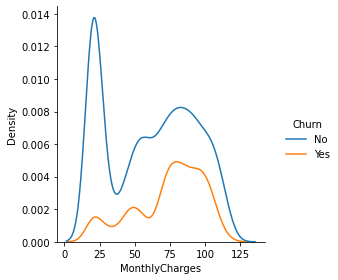

In [21]:
sns.displot(data=df,x="MonthlyCharges",hue="Churn",kind="kde",height=4);

Churn rate is very low when monthly charges is lower than aprroximately 25 units. Otherwise similiar distribution of customers.

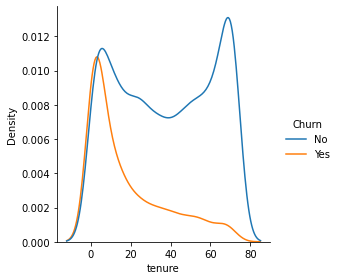

In [22]:
sns.displot(data=df,x="tenure",hue="Churn",kind="kde",height=4);

Tenure as we initially assumed is looks like a very important factor. The longer the tenure the less likely the Customer will churn.The company should work on retaining customers for the initial 1-2 years which seem to be the most important in terms of retaining them in the long term.

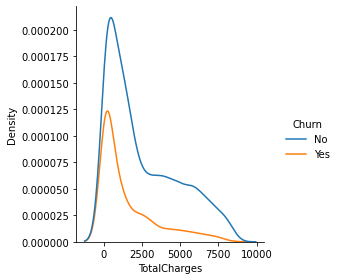

In [23]:
sns.displot(data=df,x="TotalCharges",hue="Churn",kind="kde",height=4);

Similar pattern observed for both category of customers.Except towards higher overall TotalCharges the churn rate drops.This probably is depicting the customers with longer plan like the 2 year plan.

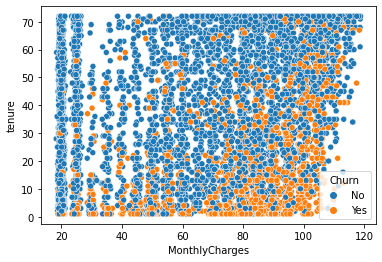

In [24]:
sns.scatterplot(data=df,x="MonthlyCharges",y="tenure",hue="Churn");

Customers tend to churn in the initial years, specially when the monthly charges are on the higher side.

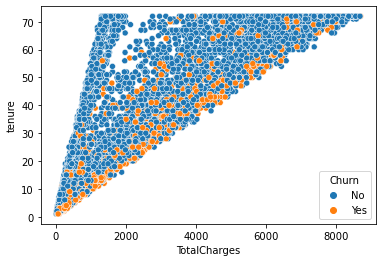

In [25]:
sns.scatterplot(data=df,x="TotalCharges",y="tenure",hue="Churn");

A highly correlated relationship and some clear boundaries can be observed.<br>
Longer a Customer stays with the company the more they would have paid overtime

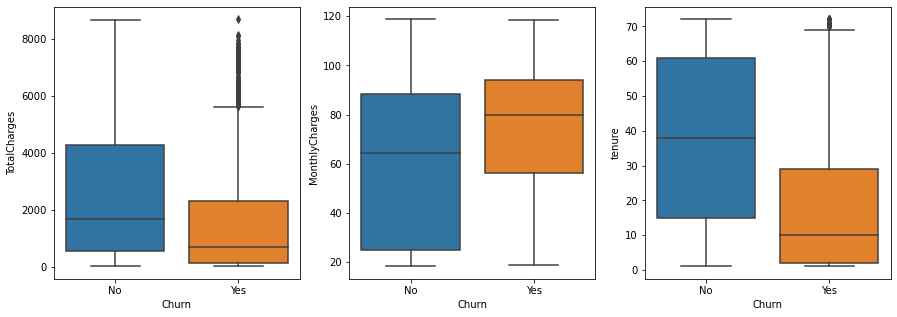

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
cols = ['TotalCharges', 'MonthlyCharges', 'tenure']
for i in range(len(cols)):
    sns.boxplot( data=df,x='Churn', y=cols[i], ax=axes[i])

Analying the distributions comparatively confirms the analysis of customers leaving the company in the intial stage of subsciption scpecially when the monthly charges are on the higher side.A large number of visible outliers are seen for customers who churn even after paying high 'TotalCharges'.<br>
These are likely long term customers who are opting out.if so then this group of people would be valuable to the company. 

In [27]:
# identifying outliers in the Total charges feature who have churned in the past month

lower_quant=df[df['Churn']=='Yes'].TotalCharges.quantile(.25)
upper_quant=df[df['Churn']=='Yes'].TotalCharges.quantile(.75)
iqr=upper_quant-lower_quant
outlier_point = upper_quant+(1.5 * iqr)

outlier_totcharge = df[ (df['Churn']=='Yes') & (df['TotalCharges'] > outlier_point) ]
num_totCharge_outliers = len(outlier_totcharge.index)
avg_spent_outliers = outlier_totcharge.TotalCharges.mean()
tot_spent_outliers = outlier_totcharge.TotalCharges.sum()

print("Number of customers who have paid high amount but discontinued service:", num_totCharge_outliers)
print("Average amount spent by such an average customer:",round( avg_spent_outliers,2))
print("Total amount of business the company is missing out on henceforth:", round(tot_spent_outliers,2))
print("This is about",round((outlier_totcharge.TotalCharges.sum()/df.TotalCharges.sum())*100,2),"% of total turnover that month")

Number of customers who have paid high amount but discontinued service: 109
Average amount spent by such an average customer: 6670.28
Total amount of business the company is missing out on henceforth: 727060.65
This is about 4.53 % of total turnover that month


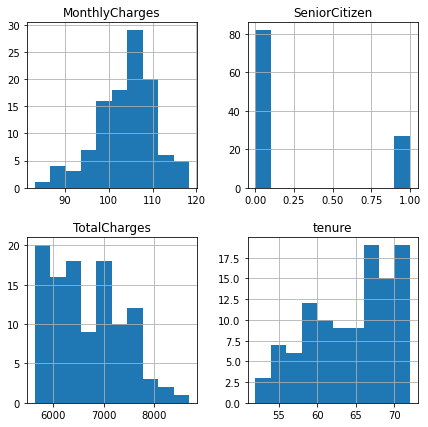

In [28]:
outlier_totcharge.hist(figsize=(7,7));

In [29]:
outlier_totcharge.SeniorCitizen.value_counts(normalize=True)

0    0.752294
1    0.247706
Name: SeniorCitizen, dtype: float64

About 75 percent of these long term Customers who have churned belong to 'SeniorCitizen' category. It is quite poosible the customer maybe sick or deceased.<br>
16 percent of customer dataset belongs to "SeniorCitizen" category so the overall number isnt as high.

In [30]:
df.SeniorCitizen.value_counts(normalize=True)

0    0.8376
1    0.1624
Name: SeniorCitizen, dtype: float64

## **Analysing Categorical Features**

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


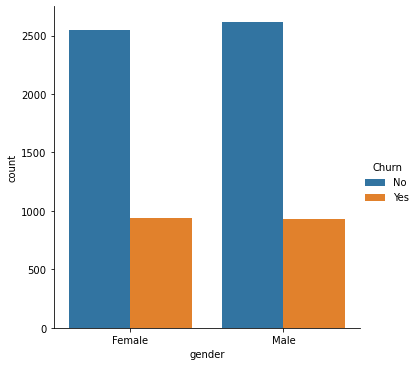

In [32]:
ax=sns.catplot(x="gender",hue="Churn",data=df,kind="count");

Gender seems to have no specific impact on Churn outcome.

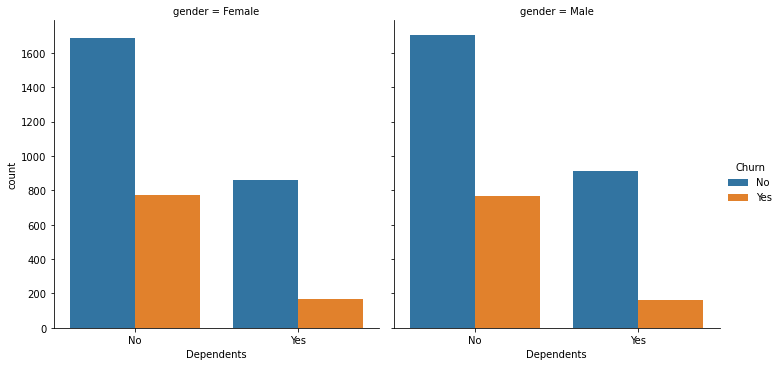

In [33]:
g=sns.catplot(x="Dependents",hue="Churn",data=df,kind="count",col="gender");

Total number of Customers without dependents is imbalanced compared to those with dependents.<br>
Neverthless ratio of people without dependents tend to churn more, uniform behaviour acoss both genders as seen before this as well.

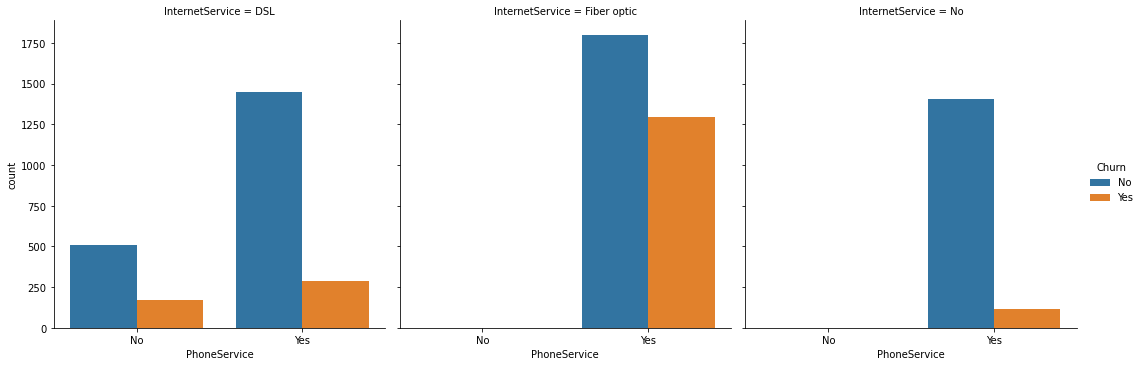

In [34]:
ax=sns.catplot(x="PhoneService",hue="Churn",data=df,kind="count",col="InternetService");

Many Customers have churned after using the Fibre Optic as an 'InternetService' option.<br>
Given that Fiber optic would be costlier and most customers who have churned seemed to have higher 'MonthlyCharges'.<br>
This may seem to indicate that the tariff plans for Fiber optic feature may not be a good value for money.<br>
A market study would give a good indication if hypothesis is true.

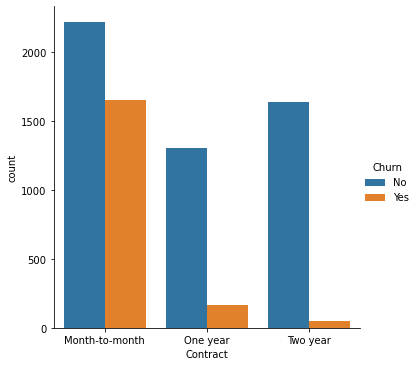

In [35]:
ax=sns.catplot(x="Contract",hue="Churn",data=df,kind="count");

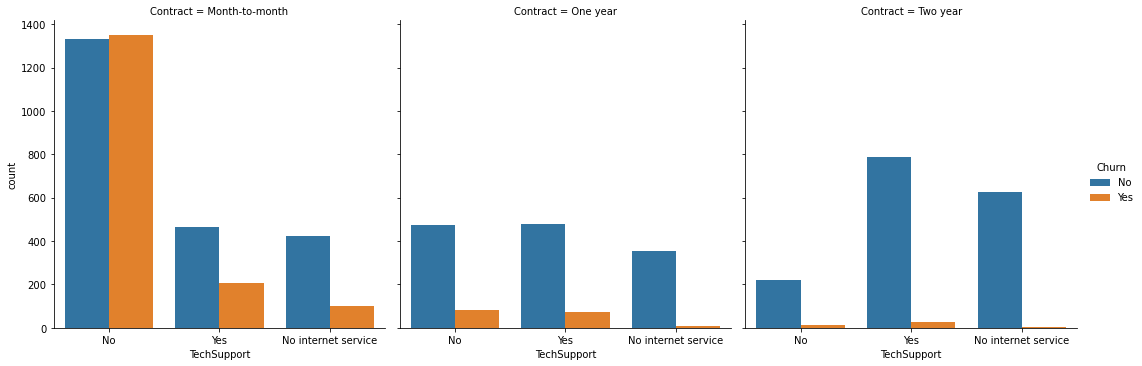

In [36]:
ax=sns.catplot(x="TechSupport",hue="Churn",data=df,kind="count",col="Contract");

The ratio of people who churn in all these graphs are higher for customers who never recieved or availed for "TechSupport".
Which probably means "TechSupport" has done a good job for those it has been in touch with, especially over time with customers over long contracts.<br>
To confirm influence of "TechSupport" we can directly analyse the customers who churned on the basis of only their contracts. 

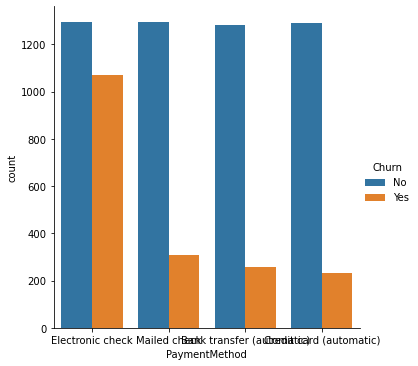

In [37]:
ax=sns.catplot(x="PaymentMethod",hue="Churn",data=df,kind="count");

Disproportionate ratio of people churning used Electronic check as medium of Payment

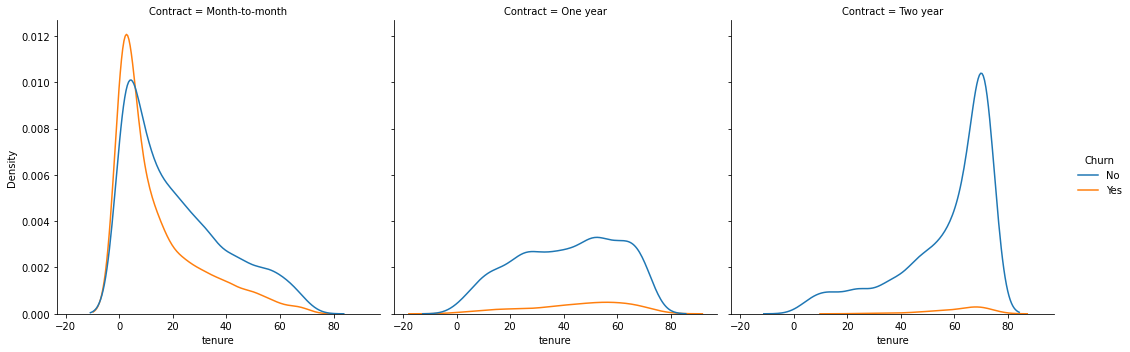

In [38]:
sns.displot(data=df,x="tenure",hue="Churn",col="Contract",kind="kde");

Most monthly contracts Churn in the initial months while those opting for longer contacts usually tend to keep extending longer.

When analysing the numerical variables we already identified that customers with a high "MonthlyCharges" value tends to churn more often.Lets check if any categorical value adds more meaning to that information.

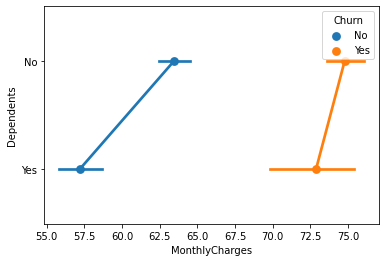

In [39]:
ax=sns.pointplot(x="MonthlyCharges",y="Dependents",hue="Churn",data=df)

Customers with Dependents or Partners have lower "MonthlyCharges"

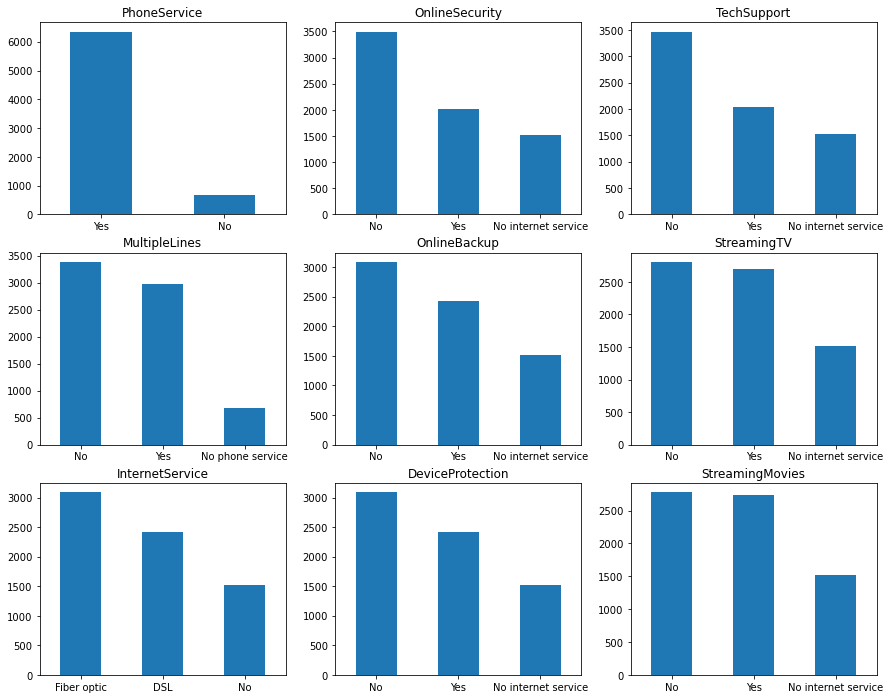

In [40]:
services=['PhoneService','MultipleLines','InternetService','OnlineSecurity',
          'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,12))
for i,feat in enumerate(services):
    if i<3:
        ax=df[feat].value_counts().plot(kind='bar',ax=axes[i,0],rot=0)    
    elif i>=3 and i<6:
        ax=df[feat].value_counts().plot(kind='bar',ax=axes[i-3,1],rot=0)
    elif i<9:
        ax=df[feat].value_counts().plot(kind='bar',ax=axes[i-6,2],rot=0)    
    ax.set_title(feat)    

Overall we can see a lot of features are not getting used by customers or features are beyond a paywall hence they are not applying for them.<br>
There are also many customers without internet service altogether.Lets check how  the services are availed by a customers.

In [41]:
df['Count_OnlineServices'] =(df[['OnlineSecurity','DeviceProtection','StreamingMovies','TechSupport',
                                 'StreamingTV', 'OnlineBackup']]=='Yes').sum(axis=1)

agg=df.replace('Yes',1).replace('No',0).replace('No internet service',0).groupby('Count_OnlineServices',as_index=False)[['Churn']].mean()

agg[['Churn']]=np.round(agg[['Churn']],2)*100

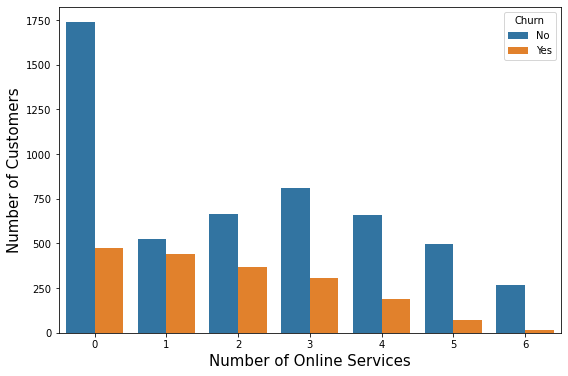

In [42]:
plt.figure(figsize=(9,6))
ax=sns.countplot(x='Count_OnlineServices',hue='Churn',data=df);
ax.set_ylabel('Number of Customers', fontsize=15);
ax.set_xlabel('Number of Online Services',fontsize=15);

Maximum customers who do not churn have not applied for any Online service.<br>
We can conclude that Customers who use only 1 feature is equivalent to almost no online features.<br>
The online features seem to add to their importance in terms of customer retentian when given in multiple combinations.<br>
As the number of online services increases beyond one service, the less is the proportion of churn.<br>
But if we consider the entire dataset the customers not applying for online service might be because of the higher charges.

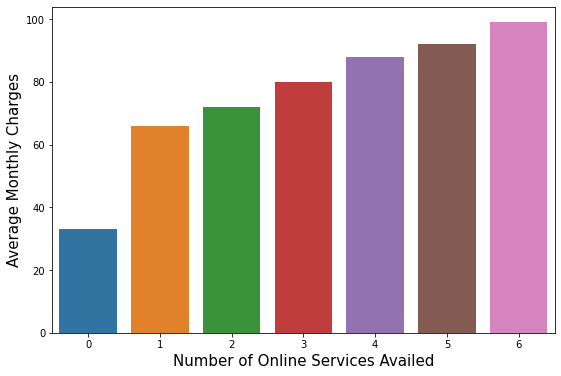

In [43]:
agg = df.replace('Yes',1).replace('No', 0).groupby('Count_OnlineServices', as_index=False)[['MonthlyCharges']].mean()
agg[['MonthlyCharges']] = np.round(agg[['MonthlyCharges']], 0)

plt.figure(figsize=(9,6))
ax = sns.barplot(x='Count_OnlineServices',y='MonthlyCharges',data=agg);
ax.set_xlabel('Number of Online Services Availed',fontsize=15);
ax.set_ylabel('Average Monthly Charges',fontsize=15);

As we can see there is a steep rise in 'Average Monthly Charges' as we go from no services availed to applying for any 1  Online Service.<br>
Further that it is a gradual rise in monthly charges.This explains the ratio of churners being high for customers who pay for 1 Online Service as seen on the graph above.

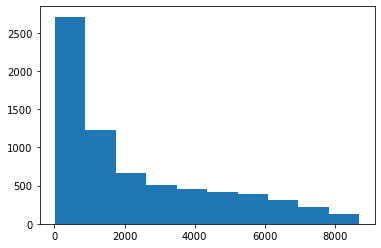

In [44]:
plt.hist(df['TotalCharges']);

In [45]:
df.dtypes

gender                   object
SeniorCitizen             int64
Partner                  object
Dependents               object
tenure                    int64
PhoneService             object
MultipleLines            object
InternetService          object
OnlineSecurity           object
OnlineBackup             object
DeviceProtection         object
TechSupport              object
StreamingTV              object
StreamingMovies          object
Contract                 object
PaperlessBilling         object
PaymentMethod            object
MonthlyCharges          float64
TotalCharges            float64
Churn                    object
Count_OnlineServices      int64
dtype: object

There are a few multi calssed columns and few binary ones. We first need to encode them appropriately inito integers.

# Scaling and encoding 

Splitting data into target and feature values

In [46]:
X=df.drop(["Churn","Count_OnlineServices"],axis=1)
y=df["Churn"]

**Encoding target**

In [47]:
from sklearn.preprocessing import LabelEncoder

lbe=LabelEncoder()
y=lbe.fit_transform(y)

Data has many types of categories, creating a structure to encode them accordingly.
Creating seperate copies of categorical and numerical data

In [48]:
cat_cols=X.nunique()[X.nunique()<5].keys().tolist()
cat_cols=[x for x in cat_cols if x in X]

num_cols=[x for x in X.columns if x not in cat_cols]

In [ ]:
cat_cols=X.nunique()[X.nunique()<5].keys().tolist()
cat_cols=[x for x in cat_cols if x in X]

num_cols=[x for x in X.columns if x not in cat_cols]




std=StandardScaler()
sc_num=std.fit_transform(X[num_cols])
sc_num=pd.DataFrame(sc_num,columns=num_cols)

**Scaling Numerical features**

**Encoding categorical features**.<br>
Within categorical creating a subgroup so that binary classes are encoded defferently from the multiclass features

In [50]:
bin_cols=X.nunique()[X.nunique() == 2].keys().tolist()
multi_cols=[x for x in cat_cols if x not in bin_cols]


#Label encoding Binary columns
for x in bin_cols :
    X[x]=lbe.fit_transform(X[x])

# Creating a subgroup of categorical columns of multiclass features and encoding them with dummies.
X=pd.get_dummies(data=X,columns=multi_cols,drop_first=True )

In [51]:
#Updating dataframe with new Features
X=X.copy()
X=X.drop(columns=num_cols,axis=1)
X=X.merge(sc_num,left_index=True,right_index=True,how="left")

X.shape

(7032, 30)

'x'

In [52]:
feature_names=X.columns.tolist()

In [53]:
for col in X.columns:
    if X[col].dtype=='float64':X[col]=df[col].astype('float32')
    if X[col].dtype=='int64':X[col]=X[col].astype('int32')
    if X[col].dtype=='uint8':X[col]=X[col].astype('int32')

Checking for high multicolinearity

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(v):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = v.columns
    vif["VIF"] = [variance_inflation_factor(v.values,i) for i in range(v.shape[1])]

    high_vif = vif[vif["VIF"] > 5].sort_values("VIF",ascending=False)

    
    return(high_vif)

In [55]:
calc_vif(X)

,variables,VIF
18,StreamingTV_No internet service,inf
9,InternetService_No,inf
10,OnlineSecurity_No internet service,inf
12,OnlineBackup_No internet service,inf
20,StreamingMovies_No internet service,inf
14,DeviceProtection_No internet service,inf
16,TechSupport_No internet service,inf
4,PhoneService,1773.528800
28,MonthlyCharges,866.089633
8,InternetService_Fiber optic,148.500813


Creating an optimised copy of dataset by removing features with high multicolinearity.

In [56]:
X1=X.drop(['StreamingTV_No internet service','InternetService_No',
          'OnlineSecurity_No internet service','OnlineBackup_No internet service',
          'StreamingMovies_No internet service','DeviceProtection_No internet service',
           'TechSupport_No internet service','PhoneService'],axis=1)
calc_vif(X1)

,variables,VIF
20,MonthlyCharges,43.328521
21,TotalCharges,19.020737
19,tenure,17.486776
7,InternetService_Fiber optic,9.218126


**Train_test_split**

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size =0.2,random_state =1,stratify=y)

print(Counter(y_train))

<IPython.core.display.Javascript object>

Counter({0: 4130, 1: 1495})


Creating another model with dataframe optimised to deal with multicolinearity.

In [58]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1, y,test_size = 0.2,random_state = 1,stratify=y)

<IPython.core.display.Javascript object>

In addition to this lets create a few more subsets of data by using various ways of balancing out the Class Imbalance,starting  with **SMOTE**.

In [59]:
from imblearn.over_sampling import SMOTE

osmote=SMOTE()
Xs_train,ys_train=osmote.fit_resample(X_train,y_train)
Xs_test,ys_test=osmote.fit_resample(X_test,y_test)

print(Counter(ys_train))

Counter({0: 4130, 1: 4130})


Creating another optimised copy with undersampled data using **RandomUnderSampler**.

In [60]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler()
Xrus_train,yrus_train =rus.fit_sample(X_train,y_train)
Xrus_test,yrus_test   =rus.fit_sample(X_test,y_test)

print(Counter(yrus_train))

Counter({0: 1495, 1: 1495})


Removing nearest majority neighbors **TomekLinks**.

In [61]:
from imblearn.under_sampling import TomekLinks

tl=TomekLinks()
Xtl_train,ytl_train =tl.fit_sample(X_train,y_train)
Xtl_test,ytl_test   =tl.fit_sample(X_test,y_test)

print(Counter(ytl_train))

Counter({0: 3668, 1: 1495})


And finally also trying a cluster based undersampling using **ClusterCentroids**.

In [62]:
from imblearn.under_sampling import ClusterCentroids

cc=ClusterCentroids()
Xcc_train,ycc_train =cc.fit_sample(X_train,y_train)
Xcc_test,ycc_test   =cc.fit_sample(X_test,y_test)

print(Counter(ycc_train))

Counter({0: 1495, 1: 1495})


We have created multiple copies of original dataframe to check which makes a better model eventually.<br>
We can start building some predictive models to check which performs best.

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

Building some base models without optimisation.

In [64]:
classifiers = [['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['LogisticRegression :', LogisticRegression()],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()],
               ['Bagging :', BaggingClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()],
               ['CatBoost :', CatBoostClassifier(logging_level='Silent')]]

for name,classifier in classifiers:
    clf=classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    print(f'\n {name} \n')
    print(f'Training Score for {name}  {clf.score(X_train,y_train) * 100:.2f}' )
    print(f'Testing Score for {name} {clf.score(X_test,y_test) * 100:.2f}' )
    print(f'Classification report  \n {classification_report(y_test,y_pred)}' )
    print(f'Confusion matrix  \n {confusion_matrix(y_test,y_pred)}' )
    print(f'ROC AUC  : {roc_auc_score(y_test,y_pred)}' )
    
    
    
    
    #print ("\n Classification report : \n",classification_report(y_test,y_pred))
    #print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    #conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    #model_roc_auc = roc_auc_score(testing_y,predictions) 
    #print ("Area under curve : ",model_roc_auc,"\n")
    #fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])


 Naive Bayes : 

Training Score for Naive Bayes :  66.22
Testing Score for Naive Bayes : 63.75
Classification report  
               precision    recall  f1-score   support

           0       0.91      0.56      0.69      1033
           1       0.41      0.85      0.56       374

    accuracy                           0.64      1407
   macro avg       0.66      0.71      0.62      1407
weighted avg       0.78      0.64      0.66      1407

Confusion matrix  
 [[578 455]
 [ 55 319]]
ROC AUC  : 0.7062382552246455

 KNeighbours : 

Training Score for KNeighbours :  82.77
Testing Score for KNeighbours : 76.83
Classification report  
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      1033
           1       0.59      0.44      0.50       374

    accuracy                           0.77      1407
   macro avg       0.70      0.66      0.68      1407
weighted avg       0.75      0.77      0.76      1407

Confusion matrix  
 [[917 116]


As we can all the base ensamble models overfit.<br>
Naive Bayes base model does a balanced job in dealing with data and sets a minimum baseline.<br>
KNeighbors although has higher accuracy overfits and gets a recall below 50 percent for minority target hence has a lower auc than naive bayes.<br>
SVM has the same test and training score because it is not able to capture the minority class at all as we see a f1score of 0 and a AUC of 50 percent.<br>
LogisticRegression base model has got the highest accuracy probably indicating data has been scaled properly and the relatiosnhips between features are linear.<br>
Decision tree,Random Forest overfits as expected.<br>
Base model of bagging has not been useful but boosting has helped solved overfitting.<br>
These are only base models but the early indications look good.<br>
Lets also check accuracies of same models on the earlier optimised datasets which might give an idea which one to use ahead.

Running base models on dataset from without high VIF

In [65]:
for name,classifier in classifiers:
    clf=classifier.fit(X1_train,y1_train)
    y_pred=classifier.predict(X1_test)
    print(f'Training Score for {name} : {clf.score(X1_train,y1_train) * 100:.2f}' )
    print(f'Testing Score for {name} : {clf.score(X1_test,y1_test) * 100:.2f}' )

Training Score for Naive Bayes : : 75.56
Testing Score for Naive Bayes : : 73.85
Training Score for KNeighbours : : 82.74
Testing Score for KNeighbours : : 76.83
Training Score for SVM : : 73.42
Testing Score for SVM : : 73.42
Training Score for LogisticRegression : : 80.59
Testing Score for LogisticRegression : : 79.53
Training Score for DecisionTree : : 99.72
Testing Score for DecisionTree : : 72.71
Training Score for RandomForest : : 99.72
Testing Score for RandomForest : : 78.75
Training Score for Bagging : : 97.88
Testing Score for Bagging : : 75.20
Training Score for AdaBoostClassifier : : 80.96
Testing Score for AdaBoostClassifier : : 79.18
Training Score for GradientBoostingClassifier:  : 82.99
Testing Score for GradientBoostingClassifier:  : 79.53
[10:15:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'log

The accuracy for naive bayes increases by 10 percent indicating good optimisation.<br>
Catboost model stabiles slightly.<br>
Apart from these all models nearly look identical from before.

Lets try on the dataset derived from **SMOTE** 

In [66]:
for name,classifier in classifiers:
    clf=classifier.fit(Xs_train,ys_train)
    ys_pred=classifier.predict(Xs_test)
    print(f'Training Score for {name} : {clf.score(Xs_train,ys_train) * 100:.2f}' )
    print(f'Testing Score for {name} : {clf.score(Xs_test,ys_test) * 100:.2f}' )

Training Score for Naive Bayes : : 78.83
Testing Score for Naive Bayes : : 77.73
Training Score for KNeighbours : : 84.25
Testing Score for KNeighbours : : 70.14
Training Score for SVM : : 66.60
Testing Score for SVM : : 64.91
Training Score for LogisticRegression : : 82.13
Testing Score for LogisticRegression : : 81.41
Training Score for DecisionTree : : 99.81
Testing Score for DecisionTree : : 74.20
Training Score for RandomForest : : 99.81
Testing Score for RandomForest : : 81.46
Training Score for Bagging : : 98.84
Testing Score for Bagging : : 80.25
Training Score for AdaBoostClassifier : : 83.26
Testing Score for AdaBoostClassifier : : 82.82
Training Score for GradientBoostingClassifier:  : 85.29
Testing Score for GradientBoostingClassifier:  : 82.67
[10:15:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'log

Naive Bayes,LogisticRegression  performance keeps getting better.<br>
KNeighbours,SVM have performed porrly compared to before.<br>
Accuracy of other ensambled Techniques have increased by 2-3 percent.

Executing the same models dataset derived from **RandomUnderSampler**

In [67]:
for name,classifier in classifiers:
    clf=classifier.fit(Xrus_train,yrus_train)
    y_pred=classifier.predict(Xrus_test)
    print(f'Training Score for {name} : {clf.score(Xrus_train,yrus_train) * 100:.2f}' )
    print(f'Testing Score for {name} : {clf.score(Xrus_test,yrus_test) * 100:.2f}' )

Training Score for Naive Bayes : : 73.14
Testing Score for Naive Bayes : : 70.99
Training Score for KNeighbours : : 78.03
Testing Score for KNeighbours : : 68.32
Training Score for SVM : : 62.41
Testing Score for SVM : : 62.57
Training Score for LogisticRegression : : 77.06
Testing Score for LogisticRegression : : 74.60
Training Score for DecisionTree : : 99.70
Testing Score for DecisionTree : : 64.84
Training Score for RandomForest : : 99.70
Testing Score for RandomForest : : 74.33
Training Score for Bagging : : 97.99
Testing Score for Bagging : : 72.99
Training Score for AdaBoostClassifier : : 77.63
Testing Score for AdaBoostClassifier : : 75.80
Training Score for GradientBoostingClassifier:  : 81.27
Testing Score for GradientBoostingClassifier:  : 75.67
[10:15:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'log

Removing data using RandomUnderSampler has made all the models less accurate,so definately a bad idea to use this dataset any further.

Next trying the features made from **Tomeklinks**

In [68]:
for name,classifier in classifiers:
    clf=classifier.fit(Xtl_train,ytl_train)
    y_pred=classifier.predict(Xtl_test)
    print(f'Training Score for {name} : {clf.score(Xtl_train,ytl_train) * 100:.2f}' )
    print(f'Testing Score for {name} : {clf.score(Xtl_test,ytl_test) * 100:.2f}' )

Training Score for Naive Bayes : : 69.07
Testing Score for Naive Bayes : : 67.44
Training Score for KNeighbours : : 84.23
Testing Score for KNeighbours : : 76.74
Training Score for SVM : : 71.04
Testing Score for SVM : : 71.01
Training Score for LogisticRegression : : 81.50
Testing Score for LogisticRegression : : 80.93
Training Score for DecisionTree : : 99.69
Testing Score for DecisionTree : : 72.33
Training Score for RandomForest : : 99.69
Testing Score for RandomForest : : 80.00
Training Score for Bagging : : 97.91
Testing Score for Bagging : : 78.29
Training Score for AdaBoostClassifier : : 81.62
Testing Score for AdaBoostClassifier : : 81.01
Training Score for GradientBoostingClassifier:  : 83.67
Testing Score for GradientBoostingClassifier:  : 80.16
[10:15:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'log

Tomeklinks seems to have favoured the boosting algortithms very well making them a lot more stable for new datasets.

Lastly trying all classifiers on dataset from **ClusterCentroids**

In [69]:
for name,classifier in classifiers:
    clf=classifier.fit(Xcc_train,ycc_train)
    y_pred=classifier.predict(Xcc_train)
    print(f'Training Score for {name} : {clf.score(Xcc_train,ycc_train) * 100:.2f}' )
    print(f'Testing Score for {name} : {clf.score(Xcc_test,ycc_test) * 100:.2f}' )

Training Score for Naive Bayes : : 75.05
Testing Score for Naive Bayes : : 76.20
Training Score for KNeighbours : : 76.82
Testing Score for KNeighbours : : 74.73
Training Score for SVM : : 68.73
Testing Score for SVM : : 68.32
Training Score for LogisticRegression : : 85.35
Testing Score for LogisticRegression : : 86.63
Training Score for DecisionTree : : 100.00
Testing Score for DecisionTree : : 81.55
Training Score for RandomForest : : 100.00
Testing Score for RandomForest : : 85.70
Training Score for Bagging : : 99.40
Testing Score for Bagging : : 84.89
Training Score for AdaBoostClassifier : : 85.89
Testing Score for AdaBoostClassifier : : 86.76
Training Score for GradientBoostingClassifier:  : 89.43
Testing Score for GradientBoostingClassifier:  : 86.63
[10:15:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'l

Resampling the data using ClusterCentroids has favoured most of the models except SVM<br>
Accuracy scores achieved on DecisionTree,RandomForest and the Bagging model are really good.
Models made from LogisticRegression,RandomForest ,AdaBoostClassifier,GradientBoostingClassifier,XGB and CatBoost have achieved above 85 percent accuracy without any hyperparameter tuning.

We will therefore use the dataset we have got from resampling using ClusterCentroids for further prediction and fine tuning of model.

# Decision Tree<br>
The Model made using ClusterCentroids gave highest accuracy so we will use that and see if it can be enhanced even more.

In [70]:
dt=DecisionTreeClassifier()
dt.fit(Xcc_train,ycc_train)

DecisionTreeClassifier()

The model without any tuning applied was overfitting on train and giving test accuracy of 79.5% on the best dataset.Lets try to improve that scoreby finding optimum value for max depth using 5 fold grid search cross validation.

In [173]:
from sklearn.model_selection import GridSearchCV

tree_params = {'max_depth': range(2, 11)}

best_dt = GridSearchCV(DecisionTreeClassifier(random_state=1),tree_params, cv=5)                  
best_dt.fit(Xcc_train,ycc_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': range(2, 11)})

In [174]:
print("Best params:", best_dt.best_params_)
print("Best cross validaton score", best_dt.best_score_)

Best params: {'max_depth': 6}
Best cross validaton score 0.8284280936454849


In [175]:
tuned_dt = DecisionTreeClassifier(max_depth=9, random_state=1)
tuned_dt.fit(Xcc_train,ycc_train)

print(f'Training Score : {tuned_dt.score(Xcc_train,ycc_train) * 100:.2f}' )
print(f'Testing Score : {tuned_dt.score(Xcc_test,ycc_test) * 100:.2f}' )

Training Score : 92.58
Testing Score : 83.56


The model has become a lot more stable and accurate lets try more parameters.

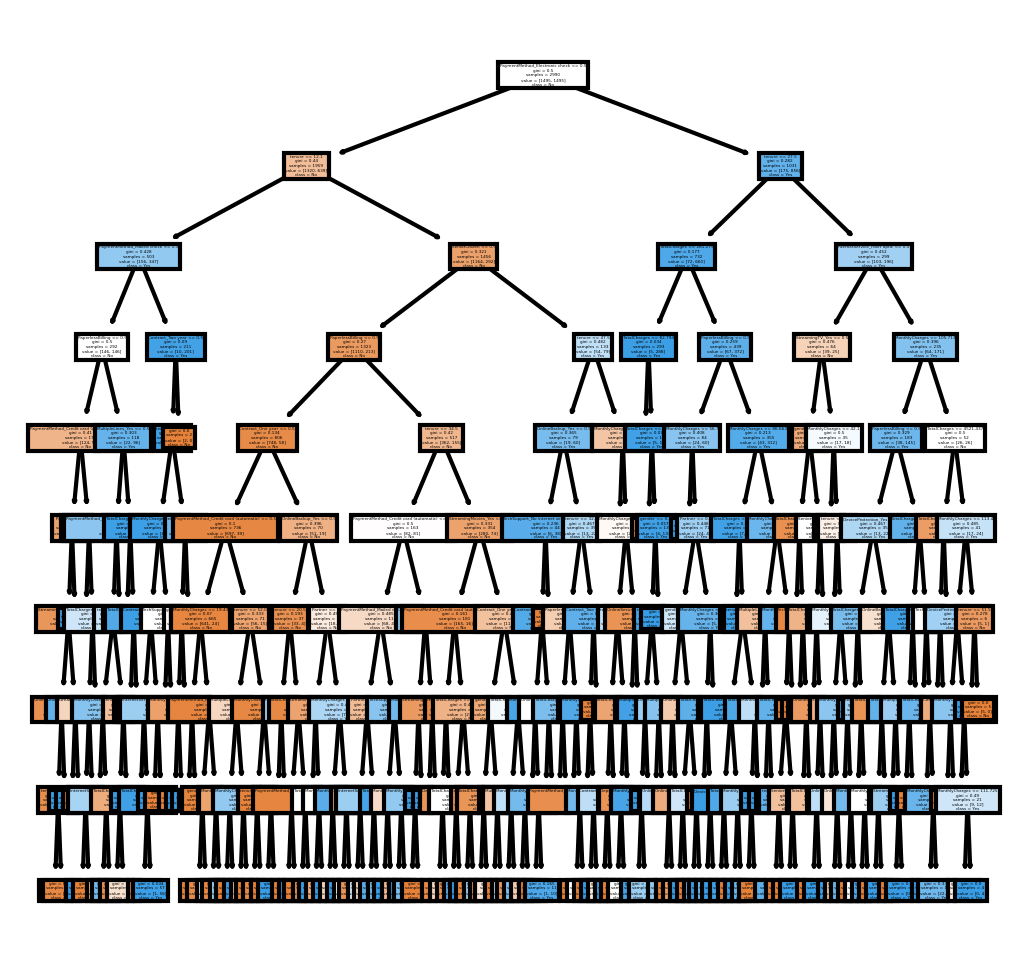

In [176]:
from sklearn.tree import plot_tree

fn = list(Xcc_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300);
plot_tree(tuned_dt, feature_names = fn, class_names=cn, filled = True);

In [177]:
#print (pd.DataFrame(tuned_dt.feature_importances_, columns = ["Imp"], index = Xcc_train.columns))

importances = pd.DataFrame({'feature':Xcc_train.columns,'importance':np.round(tuned_dt.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
25,PaymentMethod_Electronic check,0.294
27,tenure,0.245
28,MonthlyCharges,0.071
5,PaperlessBilling,0.068
26,PaymentMethod_Mailed check,0.050
29,TotalCharges,0.048
1,SeniorCitizen,0.044
24,PaymentMethod_Credit card (automatic),0.031
2,Partner,0.024
22,Contract_One year,0.017


It is clear from this table that the tree model is using "tenure" as the most important feature to predict target followed by customers who would  "PaymentMethod_Electronic check" further followed by "MonthlyCharges" , as the top 3 most important features<br>
6 out of 30 features are not used in preduction.<br>
9 out of the rest have less than 1 % influence on prediction.<br>

In [178]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"max_depth": [7],
              "max_features": range(8, 20),
              "min_samples_leaf": range(1, 9),
              'min_samples_split': [4,7,10],
              'ccp_alpha':[0,.001,.0015,.002],
              'max_features':['auto','log2',None],
              "criterion": ["gini", "entropy"]}

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tuned_dt, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(Xcc_train,ycc_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': None, 'max_depth': 7, 'criterion': 'gini', 'ccp_alpha': 0.0015}
Best score is 0.826086956521739


In [179]:
print(tree_cv.score(Xcc_train, ycc_train))
print(tree_cv.score(Xcc_test, ycc_test))

0.8548494983277592
0.8409090909090909


As we can see We have optimised this model performs much better after pre and post pruning.
it has transformed from a highly overfit data of 79% accuracy to a very balanced model of `~84% test accuracy.

In [180]:
def plot_confusionmatrix(ycc_train_pred,ycc_train):
    print(f' Confusion matrix')
    cm = confusion_matrix(dt_test_pred,ycc_train)
    sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Test accuracy score 84.09 %
 Confusion matrix


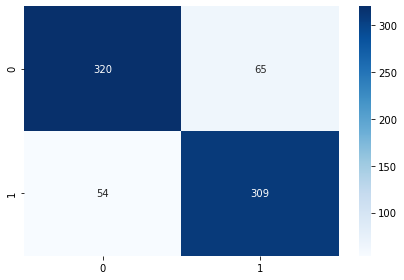

In [181]:
dt_model = tree_cv.best_estimator_
dt_model.fit(Xcc_train,ycc_train)
dt_train_pred = dt_model.predict(Xcc_train)
dt_test_pred = dt_model.predict(Xcc_test)

print(f'Test accuracy score {accuracy_score(dt_test_pred,ycc_test)* 100:.2f} %')
plot_confusionmatrix(dt_test_pred,ycc_test)

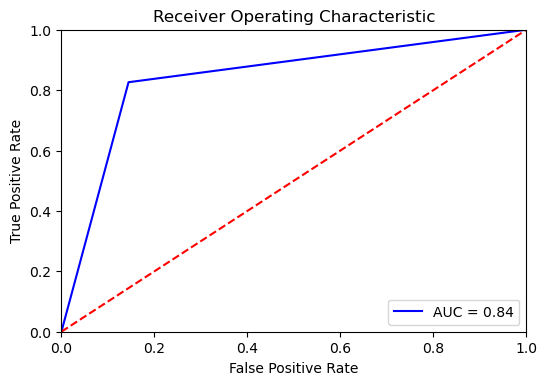

In [182]:
probs = dt_model.predict_proba(Xcc_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ycc_test, dt_test_pred)
roc_auc = metrics.auc(fpr,tpr)
plt.figure(dpi=100)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('Decision Tree')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

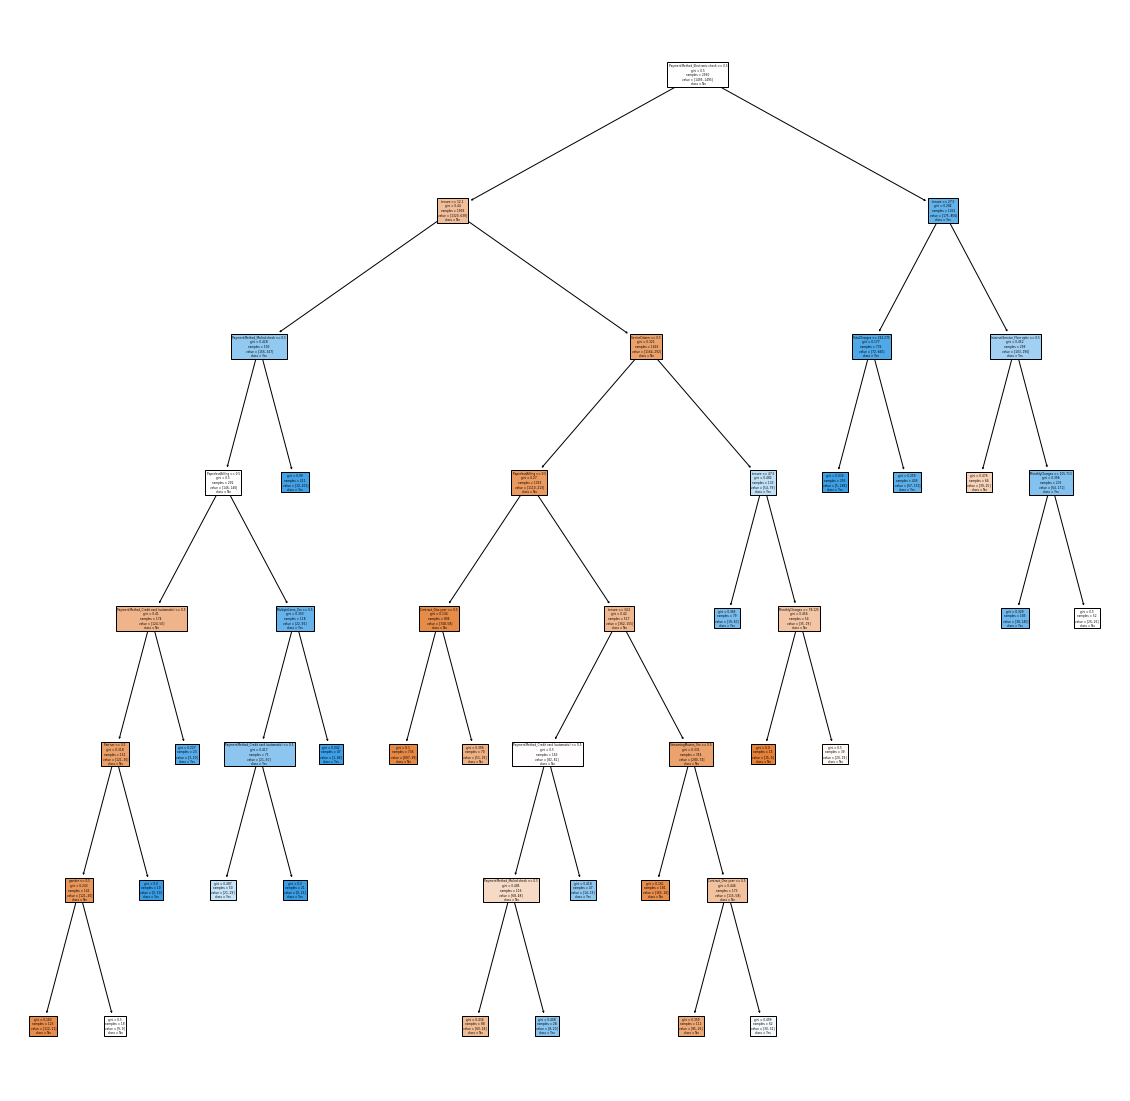

In [183]:
from sklearn import tree

plt.figure(figsize=(20,20))
features = Xcc_train.columns
classes = ['0','1']
tree.plot_tree(dt_model,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [184]:
print(classification_report(ycc_test, dt_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       374
           1       0.85      0.83      0.84       374

    accuracy                           0.84       748
   macro avg       0.84      0.84      0.84       748
weighted avg       0.84      0.84      0.84       748



We can now see a much smaller tree that has been pruned from the earlier size we saw at the start.<br>
This tree gives better predictions therefore the pruning has been meaningful which is further emphasized by a good auc and f1 score.<br>
As we saw earliear the class imbalance has been dealt with very well with the Cluster centroids,it got enhanced with pruning and tuning techniques.

# Bagging
Applying bagging on the final decision tree model.

In [185]:
bgcl = BaggingClassifier(base_estimator=dt_model,n_estimators=20,max_features=23,random_state=1).fit(Xcc_train, ycc_train)

In [186]:
bgcl_pred=bgcl.predict(Xcc_test)

print(f'Training Score : {bgcl.score(Xcc_train,ycc_train) * 100:.2f}' )
print(f'Testing Score : {bgcl.score(Xcc_test,ycc_test) * 100:.2f}' )

Training Score : 87.56
Testing Score : 84.49


Bagging has slightly increased accuracy by 1 %.

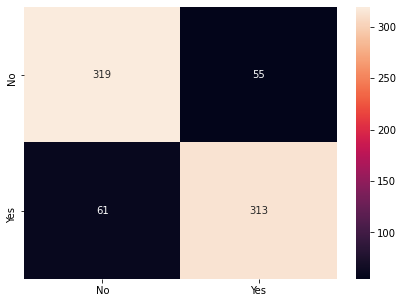

In [187]:
cm=confusion_matrix(ycc_test,bgcl_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in["No","Yes"]],columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5));
sns.heatmap(df_cm,annot=True,fmt='g');

In [188]:
print(classification_report(ycc_test, bgcl_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       374
           1       0.85      0.84      0.84       374

    accuracy                           0.84       748
   macro avg       0.85      0.84      0.84       748
weighted avg       0.85      0.84      0.84       748



No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.841
Bagging: ROC AUC=0.845


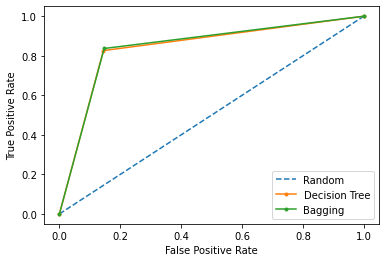

In [189]:
bgcl_probs = [0 for _ in range(len(ycc_test))]
bgcl_probs = bgcl.predict_proba(Xcc_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ycc_test, bgcl_pred)
roc_auc = metrics.auc(fpr,tpr)

fpr, tpr, threshold = metrics.roc_curve(ycc_test, dt_test_pred)

ns_probs = [0 for _ in range(len(ycc_test))]
ns_auc = roc_auc_score(ycc_test, ns_probs)
dt_auc1 = roc_auc_score(ycc_test, dt_test_pred)
bgcl_auc2 = roc_auc_score(ycc_test, bgcl_pred)

#find ROC score:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc1))
print('Bagging: ROC AUC=%.3f' % (bgcl_auc2))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ycc_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(ycc_test, dt_test_pred)
bgcl_fpr, bgcl_tpr, _ = roc_curve(ycc_test, bgcl_pred)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
pyplot.plot(bgcl_fpr, bgcl_tpr, marker='.', label='Bagging')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend();

Bagging increase accuracy by 1 percent, True positves and true negatives have both increased uniformly compared to the final decision tree model.We can even see this reflected in the slight increase in AUC value of 0.85 from 0.84 and f1 score.

# Gradient Boosting
This base model was one of the front runners on the ClusterCentroids resampled dataframe with a Training accuracy of 89% and testing accuracy of 86%.Lets try to optimise this further. 

In [82]:
gbcl=GradientBoostingClassifier()
gbcl.fit(Xcc_train,ycc_train)

GradientBoostingClassifier()

In [83]:
gbcl.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [85]:
print("Best params:", tuned_gbcl.best_params_)
print("Best cross validaton score", tuned_gbcl.best_score_)

Best params: {'learning_rate': 0.2, 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 500, 'subsample': 0.8}
Best cross validaton score 0.8658862876254181


In [86]:
gbcl_pred=tuned_gbcl.predict(Xcc_test)

print(f'Training Score : {tuned_gbcl.score(Xcc_train,ycc_train) * 100:.2f}' )
print(f'Testing Score : {tuned_gbcl.score(Xcc_test,ycc_test) * 100:.2f}' )

Training Score : 96.29
Testing Score : 87.43


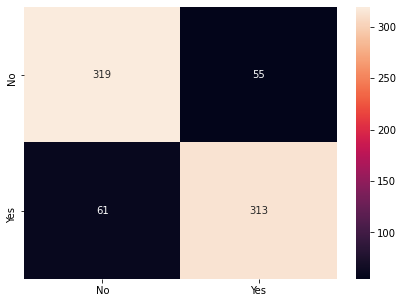

In [218]:
cm=confusion_matrix(ycc_test,bgcl_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in["No","Yes"]],columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5));
sns.heatmap(df_cm,annot=True,fmt='g');

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.841
Bagging: ROC AUC=0.845
Gradient Boosting: ROC AUC=0.877


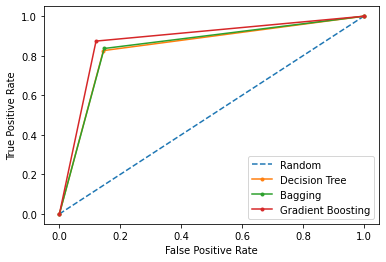

In [217]:
bgcl_probs = [0 for _ in range(len(ycc_test))]
bgcl_probs = bgcl.predict_proba(Xcc_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ycc_test, bgcl_pred)
roc_auc = metrics.auc(fpr,tpr)

fpr, tpr, threshold = metrics.roc_curve(ycc_test, dt_test_pred)

ns_probs = [0 for _ in range(len(ycc_test))]
ns_auc = roc_auc_score(ycc_test, ns_probs)
dt_auc1 = roc_auc_score(ycc_test, dt_test_pred)
bgcl_auc2 = roc_auc_score(ycc_test, bgcl_pred)
gbcl_auc3 = roc_auc_score(ycc_test, gbcl_pred)

#find ROC score:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc1))
print('Bagging: ROC AUC=%.3f' % (bgcl_auc2))
print('Gradient Boosting: ROC AUC=%.3f' % (gbcl_auc3))


# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ycc_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(ycc_test, dt_test_pred)
bgcl_fpr, bgcl_tpr, _ = roc_curve(ycc_test, bgcl_pred)
gbcl_fpr, gbcl_tpr, _ = roc_curve(ycc_test, gbcl_pred)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
pyplot.plot(bgcl_fpr, bgcl_tpr, marker='.', label='Bagging')
pyplot.plot(gbcl_fpr, gbcl_tpr, marker='.', label='Gradient Boosting')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend();

In [219]:
print(classification_report(ycc_test, gbcl_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       374
           1       0.88      0.87      0.88       374

    accuracy                           0.88       748
   macro avg       0.88      0.88      0.88       748
weighted avg       0.88      0.88      0.88       748



Gradient Boosting model therefore performs much better than other models, lets check out variations on GBM

# Xtreme Gradient Boosting
This model had was more on the overfit than balanced side with a very high Training accuracy of 99% and testing of 86%.We will try to reduce the overfit and get a more balanced model to predict unseen data.

In [145]:
xgbcl = xgb.XGBClassifier(random_state=1)
xgbcl.fit(Xcc_train,ycc_train)

<IPython.core.display.Javascript object>

[09:04:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [265]:
xgbcl_params = {'booster':['gbtree','gblinear'],
             'colsample_bytree':[0.8,1],
             'colsample_bynode':[0.8,1],
             'colsample_bylevel':[0.8,1],
             'learning_rate':[0.2,0.3,0.4],
             'max_depth':[2,3,4],
             'n_estimators':[100,300,500],
              'subsample':[0.8,1]}

tuned_xgbcl = GridSearchCV(XGBClassifier(random_state=1),xgbcl_params, cv=5,verbose=1,n_jobs=-1)     
tuned_xgbcl.fit(Xcc_train,ycc_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  7.8min finished


[16:52:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
  

In [266]:
print("Best params:", tuned_xgbcl.best_params_)
print("Best cross validaton score", tuned_xgbcl.best_score_)

Best params: {'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Best cross validaton score 0.8675585284280937


In [267]:
xgbcl_pred=tuned_xgbcl.predict(Xcc_test)

print("Accuracy on Train set : ", tuned_xgbcl.score(Xcc_train,ycc_train))
print("Accuracy on Test set  : ", tuned_xgbcl.score(Xcc_test,ycc_test))

Accuracy on Train set :  0.9471571906354515
Accuracy on Test set  :  0.8622994652406417


We have reduced overfit from 99 to 94 porcent and maintained test accuracy to 86%.We can consider this a much better model compared to initial.

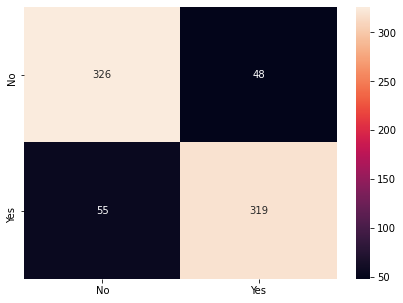

In [269]:
cm=confusion_matrix(ycc_test,xgbcl_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in["No","Yes"]],columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5));
sns.heatmap(df_cm,annot=True,fmt='g');

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.841
Bagging: ROC AUC=0.845
Gradient Boosting: ROC AUC=0.877
XGBM: ROC AUC=0.862


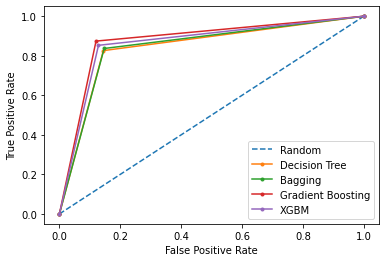

In [241]:
bgcl_probs = [0 for _ in range(len(ycc_test))]
bgcl_probs = bgcl.predict_proba(Xcc_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ycc_test, bgcl_pred)
roc_auc = metrics.auc(fpr,tpr)

fpr, tpr, threshold = metrics.roc_curve(ycc_test, dt_test_pred)

ns_probs = [0 for _ in range(len(ycc_test))]
ns_auc = roc_auc_score(ycc_test, ns_probs)
dt_auc1 = roc_auc_score(ycc_test, dt_test_pred)
bgcl_auc2 = roc_auc_score(ycc_test, bgcl_pred)
gbcl_auc3 = roc_auc_score(ycc_test, gbcl_pred)
xgbcl_auc4 = roc_auc_score(ycc_test, xgbcl_pred)

#find ROC score:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc1))
print('Bagging: ROC AUC=%.3f' % (bgcl_auc2))
print('Gradient Boosting: ROC AUC=%.3f' % (gbcl_auc3))
print('XGBM: ROC AUC=%.3f' % (xgbcl_auc4))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ycc_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(ycc_test, dt_test_pred)
bgcl_fpr, bgcl_tpr, _ = roc_curve(ycc_test, bgcl_pred)
gbcl_fpr, gbcl_tpr, _ = roc_curve(ycc_test, gbcl_pred)
xgbcl_fpr, xgbcl_tpr, _ = roc_curve(ycc_test, xgbcl_pred)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
pyplot.plot(bgcl_fpr, bgcl_tpr, marker='.', label='Bagging')
pyplot.plot(gbcl_fpr, gbcl_tpr, marker='.', label='Gradient Boosting')
pyplot.plot(xgbcl_fpr, xgbcl_tpr, marker='.', label='XGBM')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend();

In [242]:
print(classification_report(ycc_test, xgbcl_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       374
           1       0.87      0.85      0.86       374

    accuracy                           0.86       748
   macro avg       0.86      0.86      0.86       748
weighted avg       0.86      0.86      0.86       748



the Gbm model has done better surprisingly to the Xgbm.It is probably because the training score to test score ratio is much better than in Gradient bosst model.

# Random Forest
This model had was more on the overfit than balanced side with a very high Training accuracy of 99% and a commparitively low testing of 78%.Lets optimise this and see if it can give accuracy close to other ensemble models.

In [251]:
rf =RandomForestClassifier(random_state=1)
rf.fit(Xcc_train,ycc_train)

RandomForestClassifier(random_state=1)

In [252]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [299]:
rf = RandomForestClassifier(random_state=1)
rf_params = {'ccp_alpha':[0,0.001,0.002],
             'criterion':['gini','entropy'],
             'max_depth':[3,4,5],
             'max_features':['auto','log2']}

rf_grid = GridSearchCV(estimator=rf,param_grid=rf_params,cv=5,verbose=1,n_jobs=-1)

tuned_rf = rf_grid.fit(Xcc_train, ycc_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.0s finished


In [300]:
rf_grid.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2'}

In [301]:
rf_pred=tuned_rf.predict(Xcc_test)

print("Accuracy on Train set : ", tuned_rf.score(Xcc_train,ycc_train))
print("Accuracy on Test set  : ", tuned_rf.score(Xcc_test,ycc_test))

Accuracy on Train set :  0.8595317725752508
Accuracy on Test set  :  0.8556149732620321


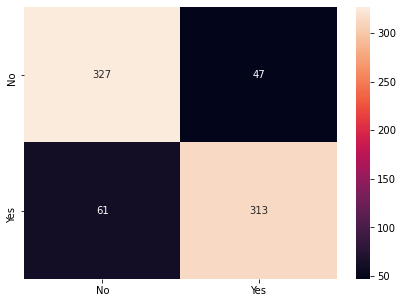

In [302]:
cm=confusion_matrix(ycc_test,rf_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in["No","Yes"]],columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5));
sns.heatmap(df_cm,annot=True,fmt='g');

In [ ]:
y_predict=rf.predict(X_test)

print(rf.score(X_test,y_test))

cm=confusion_matrix(y_test,y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in["No","Yes"]],columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5));
sns.heatmap(df_cm,annot=True,fmt='g');

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=3, scoring='f1')
print(scores)
print(f"Random Forest F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.841
Bagging: ROC AUC=0.845
Gradient Boosting: ROC AUC=0.877
XGBM: ROC AUC=0.862
Random Forest: ROC AUC=0.856


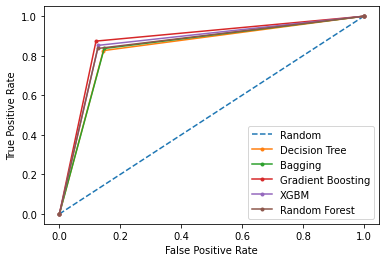

In [305]:
bgcl_probs = [0 for _ in range(len(ycc_test))]
bgcl_probs = bgcl.predict_proba(Xcc_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ycc_test, bgcl_pred)
roc_auc = metrics.auc(fpr,tpr)

fpr, tpr, threshold = metrics.roc_curve(ycc_test, dt_test_pred)

ns_probs = [0 for _ in range(len(ycc_test))]
ns_auc = roc_auc_score(ycc_test, ns_probs)
dt_auc1 = roc_auc_score(ycc_test, dt_test_pred)
bgcl_auc2 = roc_auc_score(ycc_test, bgcl_pred)
gbcl_auc3 = roc_auc_score(ycc_test, gbcl_pred)
xgbcl_auc4 = roc_auc_score(ycc_test, xgbcl_pred)
rf_auc5 = roc_auc_score(ycc_test, rf_pred)

#find ROC score:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc1))
print('Bagging: ROC AUC=%.3f' % (bgcl_auc2))
print('Gradient Boosting: ROC AUC=%.3f' % (gbcl_auc3))
print('XGBM: ROC AUC=%.3f' % (xgbcl_auc4))
print('Random Forest: ROC AUC=%.3f' % (rf_auc5))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ycc_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(ycc_test, dt_test_pred)
bgcl_fpr, bgcl_tpr, _ = roc_curve(ycc_test, bgcl_pred)
gbcl_fpr, gbcl_tpr, _ = roc_curve(ycc_test, gbcl_pred)
xgbcl_fpr, xgbcl_tpr, _ = roc_curve(ycc_test, xgbcl_pred)
rf_fpr, rf_tpr, _ = roc_curve(ycc_test, rf_pred)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
pyplot.plot(bgcl_fpr, bgcl_tpr, marker='.', label='Bagging')
pyplot.plot(gbcl_fpr, gbcl_tpr, marker='.', label='Gradient Boosting')
pyplot.plot(xgbcl_fpr, xgbcl_tpr, marker='.', label='XGBM')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend();

In [306]:
print(classification_report(ycc_test, rf_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       374
           1       0.87      0.84      0.85       374

    accuracy                           0.86       748
   macro avg       0.86      0.86      0.86       748
weighted avg       0.86      0.86      0.86       748



We can see this model has been highly optimised from its base model.It no longer overfits.<br>
Training accuracy has come down to an appropriate 85% from 99%.<br>
Teating accuracy has increased from 78% to 85% which is a significant improvement for the model.

# Pickle
Saving the gradient boosting modedl for pickle as it had the best f1 score

In [154]:
import pickle 

#our best model has been
best_model=GradientBoostingClassifier(random_state=1,
                                      learning_rate= 0.2,
                                      max_depth= 3,
                                      max_features= 'log2',
                                      n_estimators= 500,
                                      subsample= 0.8) 

best_model.fit(Xcc_train,ycc_train)


# Save the trained model as a pickle string. 
saved_model = pickle.dumps(best_model) 


# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(Xcc_test, ycc_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(Xcc_test)

Test score: 87.43 %


# GUI development


In [222]:
from tkinter import *
from tkinter.ttk import *


#App Window
window = Tk()
window.title("CHURN PREDICTOR")
window.geometry('1000x1000+10+10')

def input():
    df_val = pd.DataFrame
    data = []
    
    gender_val=gender_combo.get()
    SeniorCitizen_val=SeniorCitizen_combo.get()
    Partner_val=Partner_combo.get()
    Dependents_val=Dependents_combo.get()
    tenure_val=tenure_txt.get()
    PhoneService_val=PhoneService_combo.get()
    MultipleLines_val=MultipleLines_combo.get()
    InternetService_val=InternetService_combo.get()
    OnlineSecurity_val=OnlineSecurity_combo.get()
    OnlineBackup_val=OnlineBackup_combo.get()
    DeviceProtection_val=DeviceProtection_combo.get()
    TechSupport_val=TechSupport_combo.get()
    StreamingTV_val=StreamingTV_combo.get()
    StreamingMovies_val=StreamingMovies_combo.get()
    Contract_val=Contract_combo.get()
    PaperlessBilling_val=PaperlessBilling_combo.get()
    PaymentMethod_val=PaymentMethod_combo.get()
    MonthlyCharges_val=MonthlyCharges_txt.get()
    TotalCharges_val=TotalCharges_txt.get()
    
    data.append([gender_val, SeniorCitizen_val, Partner_val,Dependents_val,tenure_val,PhoneService_val,MultipleLines_val,
                InternetService_val,OnlineSecurity_val,OnlineBackup_val,DeviceProtection_val,TechSupport_val,StreamingTV_val,
                StreamingMovies_val,Contract_val,PaperlessBilling_val,PaymentMethod_val,MonthlyCharges_val,TotalCharges_val])
    
    df_val = pd.DataFrame(data)
    print(df_val)
    df_val.columns =['gender_col', 'SeniorCitizen_col','Partner_col', 'Dependents_col','tenure_col','PhoneService_col',
                     'MultipleLines_col','InternetService_col','OnlineSecurity_col','OnlineBackup_col','DeviceProtection_col',
                     'TechSupport_col','StreamingTV_col','StreamingMovies_col','Contract_col','PaperlessBilling_col',
                     'PaymentMethod_col','MonthlyCharges_col','TotalCharges_col']
    
   
    sort_nums_val = {"Contract_col": {"Month-to-month":0, "One year":1, "Two year":2},
                     "PaymentMethod_col": {"Electronic check":0, "Mailed check":1, "Bank transfer (automatic)":2,
                     "Credit card (automatic)":3}}
    
    df_val= df_val.replace(sort_nums_val)
    best_model=GradientBoostingClassifier()
    best_model = best_model.fit(Xcc_train,ycc_train)
    pred = best_model.predict(df_val)
    prediction=float(pred)
    print(prediction)
    
    if pred == 0:
        Predict_txt.insert(0,"Loyal")
    else:
        Predict_txt.insert(1,"Will Churn!!!")
                           
                           
                     
gender_lbl = Label(window, text="Gender(m=0,f=1)")
gender_lbl.grid(column=0, row=0)
gender_combo = Combobox(window)
gender_combo['values']= ("0","1")
gender_combo.grid(column=1, row=0)

SeniorCitizen_lbl = Label(window, text="Senior Citizen(n=0,y=1)")
SeniorCitizen_lbl.grid(column=0, row=1)
SeniorCitizen_combo = Combobox(window)
SeniorCitizen_combo['values']= (0,1)
SeniorCitizen_combo.grid(column=1, row=1)

Partner_lbl = Label(window, text="Partner(n=0,y=1)")
Partner_lbl.grid(column=0, row=2)
Partner_combo = Combobox(window)
Partner_combo['values']= ("0","1")
Partner_combo.grid(column=1, row=2)

Dependents_lbl = Label(window, text="Dependents(n=0,y=1)")
Dependents_lbl.grid(column=0, row=3)
Dependents_combo = Combobox(window)
Dependents_combo['values']= ("0","1")
Dependents_combo.grid(column=1, row=3)


tenure_lbl=Label(window, text='Tenure(months)')
tenure_lbl.grid(column=0, row=4)
tenure_txt = Entry(window,width=22)
tenure_txt.grid(column=1, row=4)


PhoneService_lbl = Label(window, text="Phone Services(n=0,y=1)")
PhoneService_lbl.grid(column=0, row=5)
PhoneService_combo = Combobox(window)
PhoneService_combo['values']= ("0","1")
PhoneService_combo.grid(column=1, row=5)


MultipleLines_lbl = Label(window, text="Multiple Lines(n=0,y=1)")
MultipleLines_lbl.grid(column=0, row=6)
MultipleLines_combo = Combobox(window)
MultipleLines_combo['values']= ("0", "1")
MultipleLines_combo.grid(column=1, row=6)

InternetService_lbl = Label(window, text="Internet Services(n=0,y=1)")
InternetService_lbl.grid(column=0, row=7)
InternetService_combo = Combobox(window)
InternetService_combo['values']= ("0", "1")
InternetService_combo.grid(column=1, row=7)

OnlineSecurity_lbl = Label(window, text="Online Security(n=0,y=1)")
OnlineSecurity_lbl.grid(column=0, row=8)
OnlineSecurity_combo = Combobox(window)
OnlineSecurity_combo['values']= ("0", "1")
OnlineSecurity_combo.grid(column=1, row=8)

OnlineBackup_lbl = Label(window, text="Online Backup(n=0,y=1)")
OnlineBackup_lbl.grid(column=0, row=9)
OnlineBackup_combo = Combobox(window)
OnlineBackup_combo['values']= ("0", "1")
OnlineBackup_combo.grid(column=1, row=9)


DeviceProtection_lbl = Label(window, text="Device Protection(n=0,y=1)")
DeviceProtection_lbl.grid(column=0, row=10)
DeviceProtection_combo = Combobox(window)
DeviceProtection_combo['values']= ("0", "1")
DeviceProtection_combo.grid(column=1, row=10)                           
                           
TechSupport_lbl = Label(window, text="Tech Support(n=0,y=1)")
TechSupport_lbl.grid(column=0, row=11)
TechSupport_combo = Combobox(window)
TechSupport_combo['values']= ("0", "1")
TechSupport_combo.grid(column=1,row=11)

StreamingTV_lbl = Label(window, text="Streaming TV(n=0,y=1)")
StreamingTV_lbl.grid(column=0, row=12)
StreamingTV_combo = Combobox(window)
StreamingTV_combo['values']= ("No","Yes","No internet service")
StreamingTV_combo.grid(column=1, row=12)
                           
StreamingMovies_lbl = Label(window, text="Streaming Movies(n=0,y=1)")
StreamingMovies_lbl.grid(column=0, row=13)
StreamingMovies_combo = Combobox(window)
StreamingMovies_combo['values']= ("No","Yes","No internet service")
StreamingMovies_combo.grid(column=1, row=13)

Contract_lbl = Label(window, text="Contract")
Contract_lbl.grid(column=0, row=14)
Contract_combo = Combobox(window)
Contract_combo['values']= ("One year", "Two year", "Month-to-month")
Contract_combo.grid(column=1, row=14)
                        
PaperlessBilling_lbl = Label(window, text="Paperless Billing(n=0,y=1)")
PaperlessBilling_lbl.grid(column=0, row=15)
PaperlessBilling_combo = Combobox(window)
PaperlessBilling_combo['values']= ("0", "1")
PaperlessBilling_combo.grid(column=1, row=15)

PaymentMethod_lbl = Label(window, text="Payment Method")
PaymentMethod_lbl.grid(column=0, row=16)
PaymentMethod_combo = Combobox(window)
PaymentMethod_combo['values']= ("Electronic check", "Mailed check", "Bank transfer (automatic)","Credit card (automatic)")
PaymentMethod_combo.grid(column=1, row=16)

MonthlyCharges_lbl=Label(window, text='Monthly Charges')
MonthlyCharges_lbl.grid(column=0, row=17)
MonthlyCharges_txt = Entry(window,width=22)
MonthlyCharges_txt.grid(column=1, row=17)

TotalCharges_lbl=Label(window, text='Total Charges')
TotalCharges_lbl.grid(column=0, row=18)
TotalCharges_txt = Entry(window,width=22)
TotalCharges_txt.grid(column=1, row=18)


lbl = Label(window, text="Submit")
lbl.grid(column=0, row=19)   
btn = Button(window, text="Submit", command=input)
btn.grid(column=0, row=19)


Predict_lbl = Label(window, text="Predict")
Predict_lbl.grid(column=0, row=20)
Predict_txt = Entry(window,width=25)
Predict_txt.grid(column=1, row=20)

                        

window.mainloop()

To conclude

We recieved an aseembled dataset of good volume but was imbalanced so features had to be modified for best model tuning.<br>
The data being collected has a monthly velocity which can be used to study over months to vreate an even more effecient model to pick out patterns over larger span of time.<be>
There were small issues in data input which we easily fixed, apart from that the veracity of data is good.<br>
While visulising the data we could see a lot of intuitive elements represented as expected which indicates a good validity of the dataset as well.
We are getting an accuracy reading of about 80-85 percent by different methods with Gadient Boositing give 87% on new data.
Without Feature enggineering considering the  raw class imbalance these accuracy scores drop by around 10 percent.<br>
A larger Datset which does not have misbalance would be ideal.<br>
But given real world contradictions customer sets overlap hence achieving higher accuracy scores (like > 95%) is difficult for the classifiers to identify as perfect decision boundary without sacrificing either precision or recall.<br>
Also more features which tell us about the customer would be appreciated..<br>
A comparative market analysis would be helpful to diagnose more accurately why are the customers Churning.
The online streaming services is good example for that,most customers are not applying for the feature and even if they do you will find them quitting soon.<br>
People not using TechSupport from the company have higher churn rate.THey should look at making this feature much more aaccesible.<br>
Customers who like features from the company tend to stay, so new plans and analysis should be done along with market study around existing feature,their pricing study,how they can be offered in combination with other features.
The company would highly benefit with an improved retention strategy while they try to solve how to make new customers stay in the platform.